# Model creation

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Dataset

In [ ]:
df = pd.read_csv(
    "drug_consumption_2.txt",
    header=None,
    names=[
        "idx",
        "N-Score",
        "E-Score",
        "O-Score",
        "A-Score",
        "C-Score",
        "Impusiveness",
        "Sensation seeking",
        "Amphet",
        "Benzo",
        "Cannabis",
        "Heroin",
        "Ketamine",
        "Methadone",
        "Semeron",
    ],
)

df.head()

,idx,N-Score,E-Score,O-Score,A-Score,C-Score,Impusiveness,Sensation seeking,Amphet,Benzo,Cannabis,Heroin,Ketamine,Methadone,Semeron
0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0
1,2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,0,0,0,0
2,3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0,0
3,4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,0,0,0
4,5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,0,0,0,0


## Decision Tree

In [ ]:
models = {}
metrics = {}

for target in df.iloc[:, 8:15].columns:
    # Get train and test data splits, stratisfy for target.
    target_train_df, target_test_df = train_test_split(
        df, train_size=0.8, shuffle=True, stratify=df[target], random_state=0
    )

    # Get input and target from the data split.
    target_x_train, target_y_train = (
        target_train_df.iloc[:, 1:8],
        target_train_df.iloc[:, 8:15][target],
    )
    target_x_test, target_y_test = (
        target_test_df.iloc[:, 1:8],
        target_test_df.iloc[:, 8:15][target],
    )

    # Create classifier.
    target_clf = DecisionTreeClassifier()

    # Train model with data specified for target.
    target_clf.fit(target_x_train, target_y_train)
    models[target] = target_clf

    # Evaluate trained classifier.
    target_y_predictions = target_clf.predict(target_x_test)

    # Calculate metrics.
    accuracy = accuracy_score(target_y_test, target_y_predictions)
    precision = precision_score(target_y_test, target_y_predictions)
    recall = recall_score(target_y_test, target_y_predictions)
    f1 = f1_score(target_y_test, target_y_predictions)

    metrics[target] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }

models, metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Amphet': DecisionTreeClassifier(),
  'Benzo': DecisionTreeClassifier(),
  'Cannabis': DecisionTreeClassifier(),
  'Heroin': DecisionTreeClassifier(),
  'Ketamine': DecisionTreeClassifier(),
  'Methadone': DecisionTreeClassifier(),
  'Semeron': DecisionTreeClassifier()},
 {'Amphet': {'accuracy': 0.896551724137931,
   'precision': 0.047619047619047616,
   'recall': 0.05,
   'f1_score': 0.04878048780487805},
  'Benzo': {'accuracy': 0.8992042440318302,
   'precision': 0.08695652173913043,
   'recall': 0.10526315789473684,
   'f1_score': 0.09523809523809525},
  'Cannabis': {'accuracy': 0.623342175066313,
   'precision': 0.2975206611570248,
   'recall': 0.3870967741935484,
   'f1_score': 0.3364485981308411},
  'Heroin': {'accuracy': 0.9655172413793104,
   'precision': 0.0,
   'recall': 0.0,
   'f1_score': 0.0},
  'Ketamine': {'accuracy': 0.9973474801061007,
   'precision': 0.0,
   'recall': 0.0,
   'f1_score': 0.0},
  'Methadone': {'accuracy': 0.9018567639257294,
   'precision': 0.1071428

## K-NN

In [ ]:
models = {}
metrics = {}

for target in df.iloc[:, 8:15].columns:
    # Get train and test data splits, stratisfy for target.
    target_train_df, target_test_df = train_test_split(
        df, train_size=0.8, shuffle=True, stratify=df[target], random_state=0
    )

    # Get input and target from the data split.
    target_x_train, target_y_train = (
        target_train_df.iloc[:, 1:8],
        target_train_df.iloc[:, 8:15][target],
    )
    target_x_test, target_y_test = (
        target_test_df.iloc[:, 1:8],
        target_test_df.iloc[:, 8:15][target],
    )

    # Create classifier.
    target_neigh = KNeighborsClassifier(n_neighbors=5)

    # Train model with data specified for target.
    target_neigh.fit(target_x_train, target_y_train)
    models[target] = target_neigh

    # Evaluate trained classifier.
    target_y_predictions = models[target].predict(target_x_test)

    # Calculate metrics.
    accuracy = accuracy_score(target_y_test, target_y_predictions)
    precision = precision_score(target_y_test, target_y_predictions)
    recall = recall_score(target_y_test, target_y_predictions)
    f1 = f1_score(target_y_test, target_y_predictions)

    metrics[target] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }

models, metrics

## Random Forest

# Anchors

In [ ]:
!pip install alibi

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from alibi.explainers import AnchorTabular

In [ ]:
class Anchor_cal:
  # def __init__(self):

  def anchor_explain(self, select_y, test_idx=0, prt = True):
    # explain a specific instance
    model = models[select_y]
    category_map = {}
    predict_fn = lambda x: model.predict(x)

    explainer = AnchorTabular(predict_fn, feature_names, categorical_names=category_map)

    explainer.fit(target_x_train.values)

    # default test_idx = 0
    class_names = ['0','1']

    # we add the split index to the current test index + 1 to get the feature values from the original dataframe
    target_x_test.iloc[[test_idx]]


    explanation = explainer.explain(target_x_test.values[test_idx], threshold=0.95)

    target_x_test.iloc[[test_idx]]

    if prt == True:
      print('Prediction: ', class_names[explainer.predictor(target_x_test.values[test_idx].reshape(1, -1))[0]])
      print('True label: ', class_names[target_y_test.values[test_idx]])
      print(target_x_test.values[test_idx])
      print('')
      print('Anchor: %s' % (' AND '.join(explanation.anchor)))
      print('Precision: %.2f' % explanation.precision)
      print('Coverage: %.2f' % explanation.coverage)


    return explanation.anchor

  def anchor_stab(self, select_y, test_idx=0, runtime=10):
    # check the stabilty of explanation by anchor on one instance
    list_explain = []
    num_empty_exp = 0
    i = 1
    while i <= runtime:
      exp_now = Anchor_cal.anchor_explain(self, select_y, test_idx, prt = False)
      if exp_now != []:
        list_explain.append(str(exp_now[0]))
        i += 1
      else:
        num_empty_exp += 1

    diff_exp = set(list_explain)
    num_diff_exp = len(set(list_explain))

    pre_fidd = num_diff_exp / runtime

    print('Runtime: ', runtime)
    print('proportion of different explanations: %.2f' % pre_fidd )
    # print('Number of empty explanations: ', num_empty_exp)
    print('Number of different explanations: ', num_diff_exp)
    # print(diff_exp)
    # print(len(diff_exp))
    # print(list_explain)
    return list_explain, pre_fidd, num_diff_exp

  # def anchor_vis(self, list_explain):



In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

exp_anchor = Anchor_cal()

exp_anchor.anchor_explain('Amphet', 0)


Prediction:  0
True label:  0
[-0.14882  0.00332 -0.84732  0.76096  0.41594 -1.37983 -1.18084]

Anchor: E-Score > -0.70
Precision: 0.96
Coverage: 0.74


['E-Score > -0.70']

In [ ]:
list_rum = [10, 50, 100, 500, 1000]
list_diff = []
list_pro = []
for i in list_rum:
  list_explain, pre_fidd, num_diff_exp = exp_anchor.anchor_stab('Amphet',
                test_idx=0, runtime=i)
  list_diff.append(num_diff_exp)
  list_pro.append(pre_fidd)

proportion of different explanations: 0.70
Number of different explanations:  7
proportion of different explanations: 0.34
Number of different explanations:  17
proportion of different explanations: 0.20
Number of different explanations:  20
proportion of different explanations: 0.04
Number of different explanations:  20
proportion of different explanations: 0.02
Number of different explanations:  21


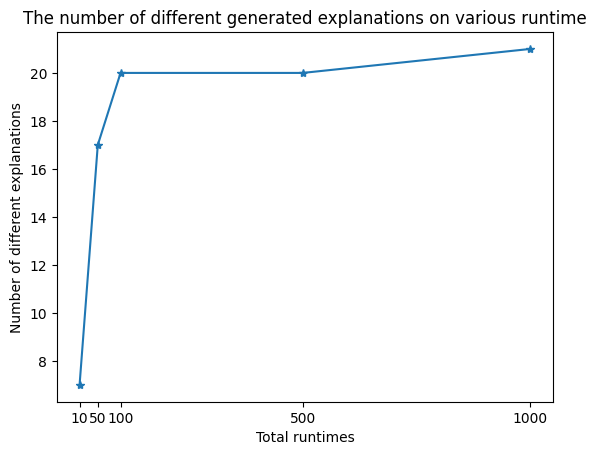

In [ ]:
import matplotlib.pyplot as plt


plt.plot(list_rum, list_diff, '*-')


plt.title('The number of different generated explanations on various runtime')
plt.xlabel('Total runtimes')
plt.ylabel('Number of different explanations')
plt.xticks(list_rum, list_rum)

plt.show()


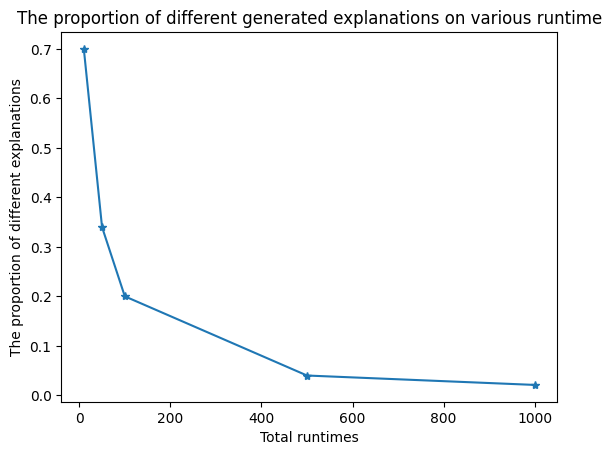

In [ ]:
plt.plot(list_rum, list_pro, '-*')


plt.title('The proportion of different generated explanations on various runtime')
plt.xlabel('Total runtimes')
plt.ylabel('The proportion of different explanations')


plt.show()